<a href="https://colab.research.google.com/github/jatyrAR/Computational_statistique/blob/master/MultiplicativeHastingMetropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1>Multiplicative Hasting Metropolis

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class HastingMetropolis():

  def __init__(self,pi,sample_from_f):
    '''
    pi : the target distribution (unknown to a constant)
    sample_from_f : sample from f a known density in [-1,1]
    '''
    self.pi=pi
    self.sample_from_f=sample_from_f

  def next_state(self,x):
    '''
    return the next state y of the markov chain in the state x
    '''
    eps=self.sample_from_f(size=(1))
    u = np.random.uniform(0,1)
    if(u<1/2) : y=eps*x 
    else : y=x/eps
    alpha = self.alpha(x,y)
    if (u<alpha): return y
    else : return x

  def alpha(self,x,y):
    return np.min([1,self.pi(y)*np.abs(y)/(np.abs(x)*self.pi(x))])

  def __call__(self,T,x0):
    '''
    run T itteration of the Multiplicative Hasting Metropolis Algorithm,
    output : array of lenght T of all the states 
    '''
    states = np.zeros(T)
    states[0]=x0
    for t in range(1,T):
      states[t]=self.next_state(states[t-1])
    return states


In [0]:
def sample_from_uniform(size):
  '''
  On a pris f(x)= uniforme sur [-1,1] 
  '''
  return np.random.uniform(-1,1,size=size)


In [0]:
def sample_from_f(size):
  '''
  On a pris f(x)=(x+1)/2 sur [-1,1] et 0 ailleurs
  On simule suivant f avec l'inverce de la cdf
  '''
  u = np.random.uniform(0,1,size=size)
  return 2*np.sqrt(u)-1

In [0]:
def objective_gaussian(x,mu=0,sigma=1):
  return np.exp(-1/(2*sigma**2)*(x-mu)**2)*1/np.sqrt(2*np.pi*sigma**2)

def objective_laplace(x,mu=0,b=2):
  return 1/b*np.exp(-np.abs(x-mu)/b)

def objective_gaussian2(x,mu=10,sigma=1):
  return np.exp(-1/(2*sigma**2)*(x-mu)**2)*1/np.sqrt(2*np.pi*sigma**2)

def objective_exp(x,l=1):
  if(type(x)==np.ndarray):
    z=np.exp(-l*x)/l
    z[z>1/l]=0
    return z
  else:
    if(x<0) : return 0
    else : return np.exp(-l*x)/l

In [0]:
HM1=HastingMetropolis(pi=objective_gaussian, sample_from_f=sample_from_f)

In [0]:
result = HM1(10000,1)

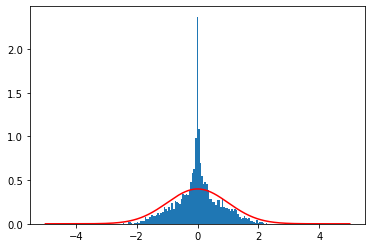

In [0]:
plt.hist(result,bins=100,density=True)
t=np.linspace(-5,5,1000)
plt.plot(t,objective_gaussian(t),color='r')

In [0]:
HM2=HastingMetropolis(pi=objective_laplace, sample_from_f=sample_from_f)

In [0]:
result = HM2(10000,0.1)

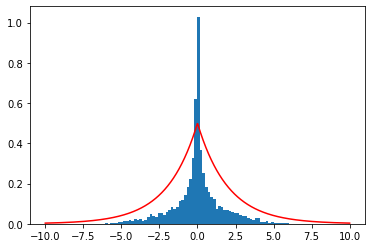

In [0]:
plt.hist(result,bins=100,density=True)
t=np.linspace(-10,10,1000)
plt.plot(t,objective_laplace(t),color='r')

On surcharge trop le centre des distributions. En effet quand on regarde $\alpha$ On a : $$\alpha(x,y)=min(1,\frac{\pi(y)|x|}{\pi(x)|y|})$$ 
Dans le cas gaussien on a : $$\alpha(x,y)=min(1,\frac{e^{-y^2/2}|x|}{e^{-x^2/2}|y|})$$ Donc quand $|x|$ tend vers 0 $\alpha$ tend vers 0, on accepte pas y et donc on reste au centre de la distribution. 

In [0]:
HM3=HastingMetropolis(pi=objective_gaussian2, sample_from_f=sample_from_f)

In [0]:
result = HM3(10000,15)

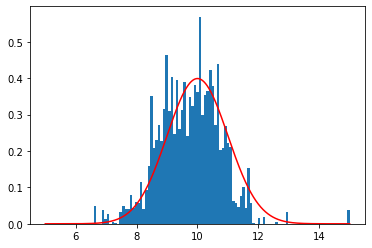

In [0]:
plt.hist(result,bins=100,density=True)
t=np.linspace(5,15,1000)
plt.plot(t,objective_gaussian2(t),color='r')

On a bien un probléme, quand x se rapproche de 0 on a un taux d'acceptation trop bas. il me semble que c'est pour cela que la distribution est décalé vers la gauche

In [0]:
HM4=HastingMetropolis(pi=objective_exp, sample_from_f=sample_from_f)

In [0]:
result = HM4(10000,15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


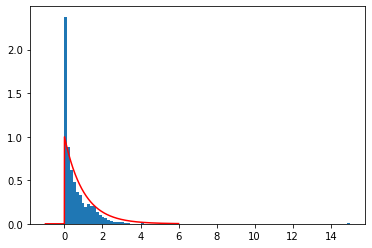

In [0]:
plt.hist(result,bins=100,density=True)
t=np.linspace(-1,6,1000)
plt.plot(t,objective_exp(t),color='r')